<a href="https://colab.research.google.com/github/AbhilashIngale/EVA-Projects/blob/master/Session6/Assignment_6A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

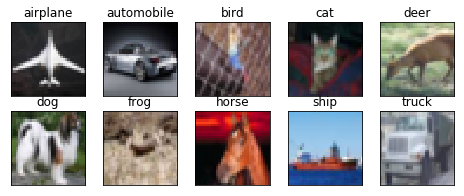

In [27]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [31]:
# Define the model
model_1 = Sequential()
model_1.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model_1.add(Activation('relu'))
model_1.add(Convolution2D(48, 3, 3))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))
model_1.add(Convolution2D(96, 3, 3, border_mode='same'))
model_1.add(Activation('relu'))
model_1.add(Convolution2D(96, 3, 3))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))
model_1.add(Convolution2D(192, 3, 3, border_mode='same'))
model_1.add(Activation('relu'))
model_1.add(Convolution2D(192, 3, 3))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(256))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes, activation='softmax'))
# Compile the model
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [32]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_20 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 15, 15, 96)        41568     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 11s 27ms/step - loss: 1.8349 - acc: 0.3011 - val_loss: 1.4649 - val_acc: 0.4629
Epoch 2/100
390/390 [==============================] - 9s 23ms/step - loss: 1.3236 - acc: 0.5218 - val_loss: 1.0907 - val_acc: 0.6076
Epoch 3/100
390/390 [==============================] - 9s 23ms/step - loss: 1.1104 - acc: 0.6090 - val_loss: 0.9690 - val_acc: 0.6538
Epoch 4/100
390/390 [==============================] - 9s 23ms/step - loss: 0.9714 - acc: 0.6580 - val_loss: 0.8780 - val_acc: 0.6930
Epoch 5/100
390/390 [==============================] - 9s 23ms/step - loss: 0.8837 - acc: 0.6941 - val_loss: 0.8075 - val_acc: 0.7196
Epoch 6/100
390/390 [==============================] - 9s 23ms/step - loss: 0.8164 - acc: 0.7177 - val_loss: 0.7627 - val_acc: 0.7363
Epoch 7/100
390/390 [==============================] - 9s 23ms/step - loss: 0.7600 - acc: 0.7382 - val_loss: 0.7073 - val_acc: 0.7586
Epoch 8/100
390/390 [==============================] - 9s 23m

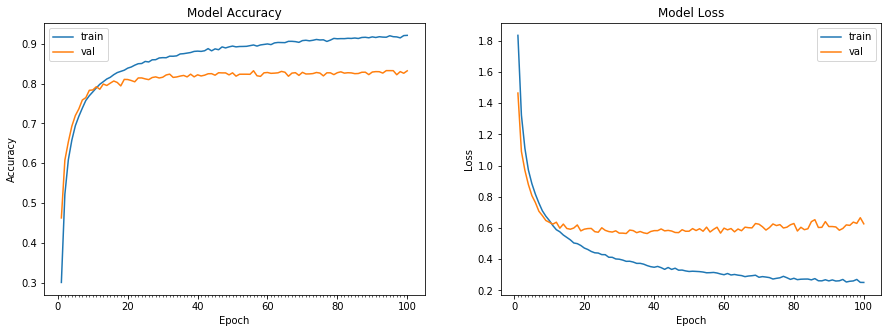

Accuracy on test data is: 83.18


In [33]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_1_info = model_1.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_1_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_1))

#Improvement over given network

In [34]:
from keras.layers import BatchNormalization as BN

# Define the model
model_2 = Sequential()
model_2.add(Convolution2D(32, 3, 3, border_mode='same',activation='relu', input_shape=(32, 32, 3))) #32, 3x3
model_2.add(BN())
model_2.add(Dropout(0.1))
model_2.add(Convolution2D(64, 3, 3,border_mode='same',activation='relu')) # 32 , 5x5 
model_2.add(BN())
model_2.add(Dropout(0.1))

model_2.add(MaxPooling2D(pool_size=(2, 2))) # 16, 10x10
model_2.add(Convolution2D(32, 1, 1, border_mode='same',activation='relu')) #16 , 10x10
model_2.add(BN())
model_2.add(Dropout(0.1))

model_2.add(Convolution2D(32, 3, 3, border_mode='same',activation='relu')) # 16, 12x12
model_2.add(BN())
model_2.add(Dropout(0.1))
model_2.add(Convolution2D(64, 3, 3,border_mode='same',activation='relu')) # 16 , 14x14 
model_2.add(BN())
model_2.add(Dropout(0.1))

model_2.add(MaxPooling2D(pool_size=(2, 2))) #8 , 28x28
model_2.add(Convolution2D(32, 1, 1, border_mode='same',activation='relu'))#8, 28x28
model_2.add(BN())

model_2.add(Convolution2D(32, 3, 3, border_mode='same',activation='relu')) #8 ,30x30
model_2.add(BN())

model_2.add(Convolution2D(10, 8, 8, activation=None))#1 , 32x32

model_2.add(Flatten())
model_2.add(Activation('softmax'))

# Compile the model
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3..., padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), activation="relu", padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel

In [35]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_32 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_16 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_33 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 64)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=80)`
  """


Epoch 1/80
390/390 [==============================] - 15s 40ms/step - loss: 1.4811 - acc: 0.4759 - val_loss: 1.3702 - val_acc: 0.5252
Epoch 2/80
390/390 [==============================] - 13s 33ms/step - loss: 1.0436 - acc: 0.6302 - val_loss: 1.1723 - val_acc: 0.5975
Epoch 3/80
390/390 [==============================] - 13s 33ms/step - loss: 0.8682 - acc: 0.6935 - val_loss: 0.9052 - val_acc: 0.6854
Epoch 4/80
390/390 [==============================] - 13s 33ms/step - loss: 0.7614 - acc: 0.7314 - val_loss: 0.8972 - val_acc: 0.6857
Epoch 5/80
390/390 [==============================] - 13s 33ms/step - loss: 0.6908 - acc: 0.7568 - val_loss: 0.8194 - val_acc: 0.7232
Epoch 6/80
390/390 [==============================] - 13s 33ms/step - loss: 0.6323 - acc: 0.7793 - val_loss: 0.9141 - val_acc: 0.6983
Epoch 7/80
390/390 [==============================] - 13s 33ms/step - loss: 0.5906 - acc: 0.7930 - val_loss: 0.7262 - val_acc: 0.7537
Epoch 8/80
390/390 [==============================] - 13s 33ms

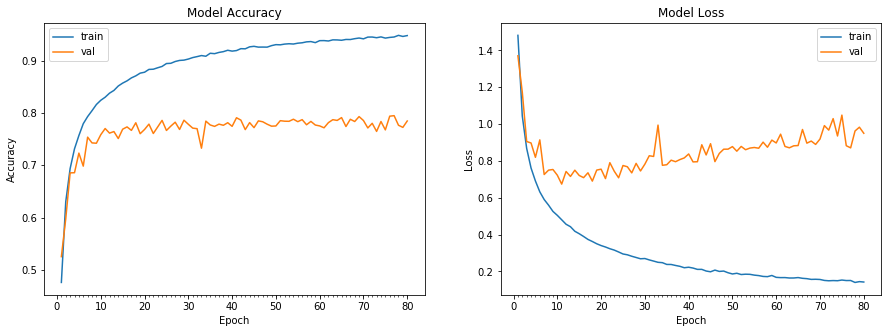

Accuracy on test data is: 78.46


In [36]:
# time the model
start_2 = time.time()
# Train the model
model_2_info = model_2.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 80, 
                                 validation_data = (test_features, test_labels), verbose=1)
end_2 = time.time()
print ("Model took %0.2f seconds to train"%(end_2 - start_2))
# plot model history
plot_model_history(model_2_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_2))